In [1]:
import numpy as np
from numpy import pi
from math import dist
from ripser import ripser
from persim import plot_diagrams
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import paired_distances

import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

# C1

In [3]:
def distance_C1(x, y, a, b):
    Y = []
    options = [-1,0,1]
    for option_a in options:
        for option_b in options:
            for option_c in options:
                Y.append([y[0] + a * option_a, y[1] + b * option_b, y[2] + 2*pi * option_c])
    
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return min(distances)

In [4]:
def generate_c1_isoms(n_isos, x_translate, y_translate):
    a = list(x_translate * np.random.random(n_isos)) 
    b = list(y_translate * np.random.random(n_isos)) 
    theta = list(2*pi * np.random.random(n_isos)) 
    
    isoms = []
    for i in range(n_isos):
        isoms.append((a[i],b[i],theta[i]))
        
    return isoms

In [6]:
isoms = generate_c1_isoms(1000, 6, 6)

M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C1(isoms[i], isoms[j],6,6)

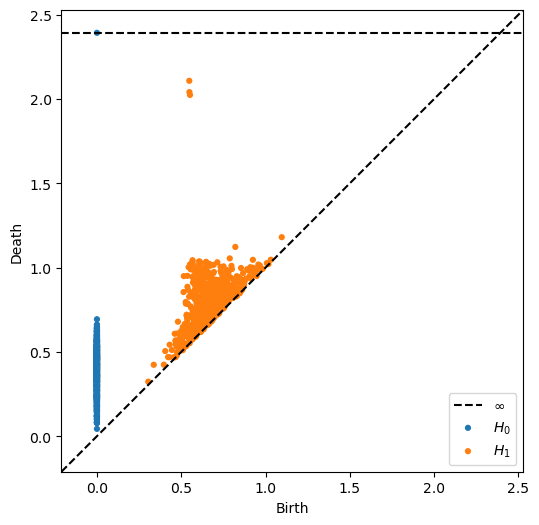

In [266]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [267]:
persistent_H1_intervals(output)

[1.5601078271865845,
 1.4924030303955078,
 1.4720627069473267,
 0.4766578674316406,
 0.46797239780426025,
 0.4659692645072937,
 0.46458178758621216,
 0.4630412459373474,
 0.45967262983322144,
 0.4587751030921936,
 0.44896435737609863,
 0.44478505849838257,
 0.44281476736068726,
 0.44185328483581543,
 0.43419235944747925,
 0.43333899974823,
 0.4313300848007202,
 0.4302629828453064,
 0.42586392164230347,
 0.4236220717430115,
 0.4191405773162842,
 0.413943350315094,
 0.41372936964035034,
 0.4095337986946106,
 0.4080926179885864,
 0.4012444019317627,
 0.39954376220703125,
 0.3889661431312561,
 0.388003945350647,
 0.38721132278442383,
 0.37880510091781616,
 0.3784623146057129,
 0.37807929515838623,
 0.3777541518211365,
 0.37320148944854736,
 0.37304288148880005,
 0.3729655146598816,
 0.3674532175064087,
 0.3614075779914856,
 0.36072415113449097,
 0.3578433394432068,
 0.35774409770965576,
 0.3570408821105957,
 0.35491931438446045,
 0.35004353523254395,
 0.3498060703277588,
 0.349178791046142

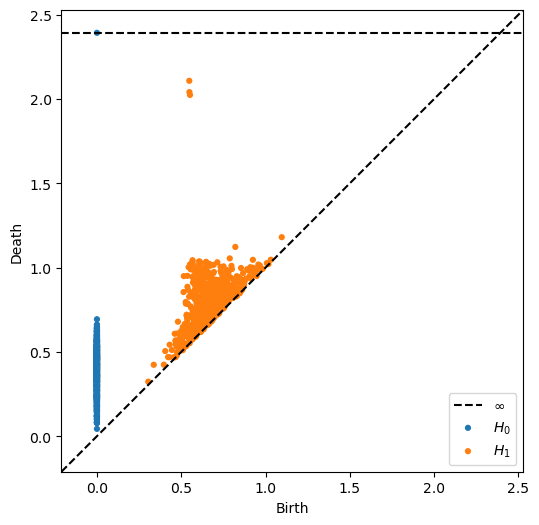

In [268]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [269]:
persistent_H1_intervals(output)

[1.5601078271865845,
 1.4924030303955078,
 1.4720627069473267,
 0.4766578674316406,
 0.46797239780426025,
 0.4659692645072937,
 0.46458178758621216,
 0.4630412459373474,
 0.45967262983322144,
 0.4587751030921936,
 0.44896435737609863,
 0.44478505849838257,
 0.44281476736068726,
 0.44185328483581543,
 0.43419235944747925,
 0.43333899974823,
 0.4313300848007202,
 0.4302629828453064,
 0.42586392164230347,
 0.4236220717430115,
 0.4191405773162842,
 0.413943350315094,
 0.41372936964035034,
 0.4095337986946106,
 0.4080926179885864,
 0.4012444019317627,
 0.39954376220703125,
 0.3889661431312561,
 0.388003945350647,
 0.38721132278442383,
 0.37880510091781616,
 0.3784623146057129,
 0.37807929515838623,
 0.3777541518211365,
 0.37320148944854736,
 0.37304288148880005,
 0.3729655146598816,
 0.3674532175064087,
 0.3614075779914856,
 0.36072415113449097,
 0.3578433394432068,
 0.35774409770965576,
 0.3570408821105957,
 0.35491931438446045,
 0.35004353523254395,
 0.3498060703277588,
 0.349178791046142

# C2

In [7]:
def distance_C2(x, y, a, b):
    
    # no translation in rotation axis
    Y = []
    options = [-1,0,1]
    for option_a in options:
        for option_b in options:
            Y.append([y[0] + a * option_a, y[1] + b * option_b, y[2]])
                      
    options = [-1,0,1]
    for option_a in options:
        for option_b in options:
            Y.append([a - y[0] + a * option_a, b - y[1] + b * option_b, y[2] + pi])
                      
    options = [-1,0,1]
    for option_a in options:
        for option_b in options:
            Y.append([a - y[0] + a * option_a, b - y[1] + b * option_b, y[2] - pi])
            
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return min(distances)

In [283]:
def generate_c2_isoms(n_isos, x_translate, y_translate):
    a = list(x_translate * np.random.random(n_isos)) 
    b = list(y_translate * np.random.random(n_isos)) 
    theta = list(pi * np.random.random(n_isos)) 
    
    isoms = []
    for i in range(n_isos):
        isoms.append((a[i],b[i],theta[i]))
        
    return isoms

In [284]:
isoms = generate_c2_isoms(1000, 3, 3)

M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C2(isoms[i], isoms[j],3,3)

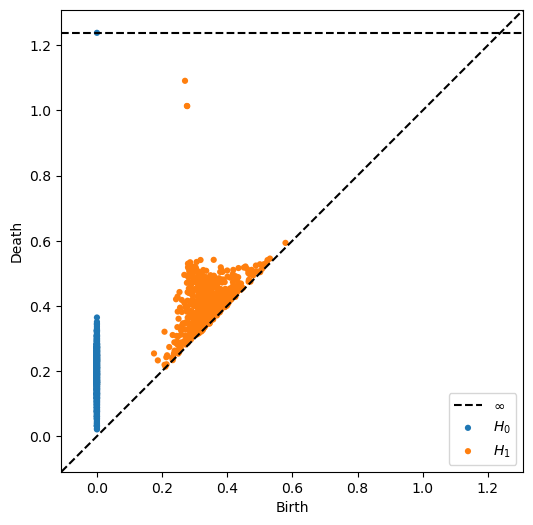

In [285]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [286]:
persistent_H1_intervals(output)

[0.8207438886165619,
 0.7377379536628723,
 0.7360919713973999,
 0.25016531348228455,
 0.2478313446044922,
 0.2419012188911438,
 0.23906904458999634,
 0.23441272974014282,
 0.2336842119693756,
 0.23238015174865723,
 0.2289644181728363,
 0.22707146406173706,
 0.22676587104797363,
 0.22583356499671936,
 0.2235281765460968,
 0.22290340065956116,
 0.22153562307357788,
 0.21956926584243774,
 0.21639838814735413,
 0.21512651443481445,
 0.21070295572280884,
 0.20926210284233093,
 0.2089376449584961,
 0.20865169167518616,
 0.20693781971931458,
 0.20619899034500122,
 0.2049630582332611,
 0.2044340968132019,
 0.20440897345542908,
 0.20405036211013794,
 0.2029256522655487,
 0.195875346660614,
 0.19461601972579956,
 0.19337791204452515,
 0.19204163551330566,
 0.18907380104064941,
 0.1866857409477234,
 0.18544387817382812,
 0.18365761637687683,
 0.18295449018478394,
 0.1810402125120163,
 0.1807791292667389,
 0.18027165532112122,
 0.18025454878807068,
 0.177626371383667,
 0.17732703685760498,
 0.1770

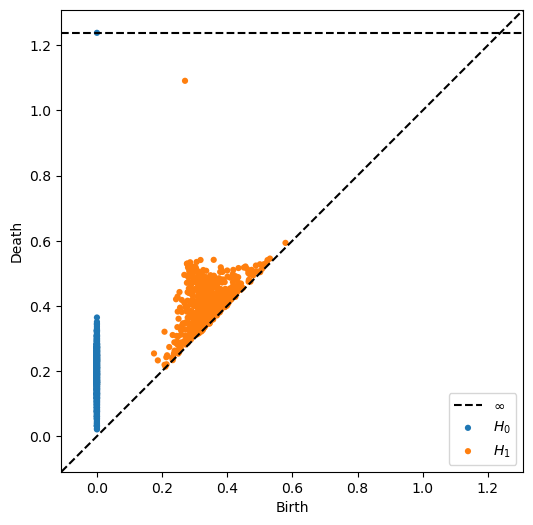

In [287]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [288]:
persistent_H1_intervals(output)

[0.8207438886165619,
 0.25353455543518066,
 0.2523283362388611,
 0.2478313446044922,
 0.24733129143714905,
 0.2419012188911438,
 0.23906904458999634,
 0.23441272974014282,
 0.2336842119693756,
 0.23238015174865723,
 0.2289644181728363,
 0.22707146406173706,
 0.22676587104797363,
 0.22583356499671936,
 0.2235281765460968,
 0.22290340065956116,
 0.22153562307357788,
 0.21956926584243774,
 0.21639838814735413,
 0.21512651443481445,
 0.21070295572280884,
 0.20926210284233093,
 0.2089376449584961,
 0.20865169167518616,
 0.20693781971931458,
 0.20619899034500122,
 0.2049630582332611,
 0.2044340968132019,
 0.20440897345542908,
 0.20405036211013794,
 0.2029256522655487,
 0.195875346660614,
 0.19461601972579956,
 0.19337791204452515,
 0.19204163551330566,
 0.18907380104064941,
 0.1866857409477234,
 0.18544387817382812,
 0.18365761637687683,
 0.18295449018478394,
 0.1810402125120163,
 0.1807791292667389,
 0.18027165532112122,
 0.18025454878807068,
 0.177626371383667,
 0.17732703685760498,
 0.177

# C4

# C3

In [11]:
def distance_C3(x, y, a):
    
    # no translation in rotation axis
    Y = []
    tri = (math.sqrt(3)/2)
    options = [-1,0,1]
    for option_a in options:
        for option_b in options:
            for option_c in options:
                Y.append([y[0] + math.sqrt(3) * a * option_a + option_b * 1.5 * a + option_c * 1.5 * a,
                          y[1] + math.sqrt(3) * a * option_a - option_b * tri * a + option_c * tri * a,
                          y[2]])
                      
    for option_a in options:
        for option_b in options:
            for option_c in options:
                Y.append([ -.5 * y[0] + 1.5 * a - tri * y[1] + math.sqrt(3) * a * option_a + option_b * 1.5 * a + option_c * 1.5 * a,
                           -.5 * y[1] + tri * y[0] - tri * a + math.sqrt(3) * a * option_a - option_b * tri * a + option_c * tri * a,
                           y[2] + (2 * math.pi / 3)])
                
    for option_a in options:
        for option_b in options:
            for option_c in options:
                Y.append([ -.5 * y[0] + 1.5 * a + tri * y[1] + math.sqrt(3) * a * option_a + option_b * 1.5 * a + option_c * 1.5 * a,
                           -.5 * y[1] - tri * y[0] + tri * a + math.sqrt(3) * a * option_a - option_b * tri * a + option_c * tri * a,
                           y[2] - (2 * math.pi / 3)])    
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return min(distances)

In [2]:
def distance_C3_correct(x, y, a):
    
    # no translation in rotation axis
    Y = [y] # no translation in any axis
    for i in [1,-1]:
        Y.append((y[0] + i * (3**0.5) * a, y[1], y[2])) # front and back
        Y.append((y[0] + i * (3/2) * a, y[1] - (3**0.5)/2 * a, y[2])) # LB and RF
        Y.append((y[0] + i * (3/2) * a, y[1] + (3**0.5)/2 * a, y[2])) # LF and RB
        
    # translate up 
    Y.append((1/2 * y[0] + 3/2 * a - (3**0.5)/2 * y[1], 1/2 * y[1] + (3**0.5)/2 * y[0] - (3**0.5)/2 * a, y[2] + 2*pi/3)) # only rotation by 2pi/3
    for i in [1,-1]:
        y1 = 1/2 * y[0] + 3/2 * a - (3**0.5)/2 * y[1]
        y2 = 1/2 * y[1] + (3**0.5)/2 * y[0] - (3**0.5)/2 * a
        Y.append((y1 + i * (3**0.5) * a, y2, y[2] + 2*pi/3)) # front and back
        Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] + 2*pi/3)) # LB and RF
        Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] + 2*pi/3)) # LF and RB    
    
    # translate down 
    Y.append((1/2 * y[0] + 3/2 * a + (3**0.5)/2 * y[1], 1/2 * y[1] - (3**0.5)/2 * y[0] + (3**0.5)/2 * a, y[2] - 2*pi/3)) # only rotation by -2pi/3
    for i in [1,-1]:
        y1 = 1/2 * y[0] + 3/2 * a + (3**0.5)/2 * y[1]
        y2 = 1/2 * y[1] - (3**0.5)/2 * y[0] + (3**0.5)/2 * a
        Y.append((y1 + i * (3**0.5) * a, y2, y[2] - 2*pi/3)) # front and back
        Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] - 2*pi/3)) # LB and RF
        Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] - 2*pi/3)) # LF and RB   
    
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return min(distances)

In [3]:
def distance_C3_metric(a):
    def wrapped(x,y):
        # no translation in rotation axis
        Y = [y] # no translation in any axis
        for i in [1,-1]:
            Y.append((y[0] + i * (3**0.5) * a, y[1], y[2])) # front and back
            Y.append((y[0] + i * (3/2) * a, y[1] - (3**0.5)/2 * a, y[2])) # LB and RF
            Y.append((y[0] + i * (3/2) * a, y[1] + (3**0.5)/2 * a, y[2])) # LF and RB
            
        # translate up 
        Y.append((1/2 * y[0] + 3/2 * a - (3**0.5)/2 * y[1], 1/2 * y[1] + (3**0.5)/2 * y[0] - (3**0.5)/2 * a, y[2] + 2*pi/3)) # only rotation by 2pi/3
        for i in [1,-1]:
            y1 = 1/2 * y[0] + 3/2 * a - (3**0.5)/2 * y[1]
            y2 = 1/2 * y[1] + (3**0.5)/2 * y[0] - (3**0.5)/2 * a
            Y.append((y1 + i * (3**0.5) * a, y2, y[2] + 2*pi/3)) # front and back
            Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] + 2*pi/3)) # LB and RF
            Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] + 2*pi/3)) # LF and RB    
        
        # translate down 
        Y.append((1/2 * y[0] + 3/2 * a + (3**0.5)/2 * y[1], 1/2 * y[1] - (3**0.5)/2 * y[0] + (3**0.5)/2 * a, y[2] - 2*pi/3)) # only rotation by -2pi/3
        for i in [1,-1]:
            y1 = 1/2 * y[0] + 3/2 * a + (3**0.5)/2 * y[1]
            y2 = 1/2 * y[1] - (3**0.5)/2 * y[0] + (3**0.5)/2 * a
            Y.append((y1 + i * (3**0.5) * a, y2, y[2] - 2*pi/3)) # front and back
            Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] - 2*pi/3)) # LB and RF
            Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] - 2*pi/3)) # LF and RB   
        
        distances = []
        for y_new in Y: 
            distances.append(dist(x,y_new))
            
        return min(distances)
        
    return(wrapped)

In [4]:
def generate_c3_isoms(n_isos, a):
    j = list() 
    k = list() 
    tri = (math.sqrt(3) / 2)
    for i in range(n_isos):
        x = 0
        y = 0
        while( y <= tri * a - math.sqrt(3) * x or
             y <= (-3 * tri) * a + math.sqrt(3) * x or
             y >= tri * a + math.sqrt(3) * x or
             y >= 5 * tri * a - math.sqrt(3) * x): 
            x = a * 2 * np.random.random()
            y = a * math.sqrt(3) * np.random.random()
        j.append(x)
        k.append(y)
    theta = list((2/3) * pi * np.random.random(n_isos)) 
    
    isoms = []
    for i in range(n_isos):
        isoms.append((j[i],k[i],theta[i]))
        
    return isoms

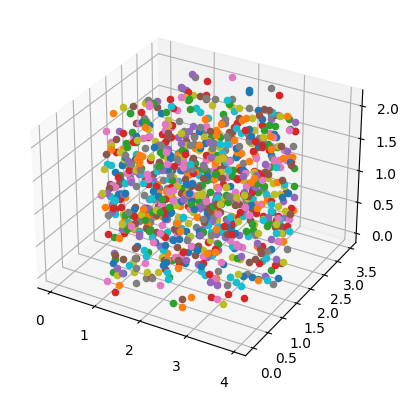

In [6]:
isoms = generate_c3_isoms(1000, 2.)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for isom in isoms:
    ax.scatter(isom[0], isom[1], isom[2], marker='o')
plt.show()

In [18]:

M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C3(isoms[i], isoms[j],1)

In [5]:
# j should be divisible by 4
def march_c3_isoms(j = 1000, a = 1):
    j = math.ceil(j / 4)
    isoms = []
    tri = (math.sqrt(3) / 2)
    steps = np.linspace(0, a, j)
    
    for elem in steps:
        isoms.append((  elem * 1.5 , -tri * elem, 0))    

    for elem in steps:
        isoms.append((a/2 + elem * 1.5, tri * elem - tri * a, 0))
        
    rotation = np.linspace(0, (2 * math.pi / 3), j)
    for elem in rotation:
        isoms.append((0, 0, elem))
    for elem in rotation:
        isoms.append((a / 2, -tri * a, elem))
        
    return isoms

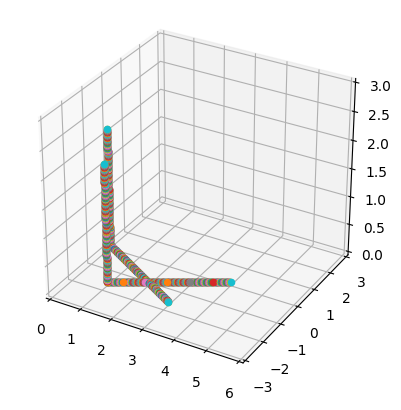

In [6]:
isoms2 = march_c3_isoms(1000, 2)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.axis('square')
plt.xlim(0, 6)
plt.ylim(-3, 3)
ax.set_zlim(0,3)
for isom in isoms2:
    ax.scatter(isom[0], isom[1], isom[2], marker='o')

plt.show()

In [8]:
paired_distances(np.array(isoms2[249]).reshape(1,-1),np.array(isoms2[499]).reshape(1,-1))

array([2.])

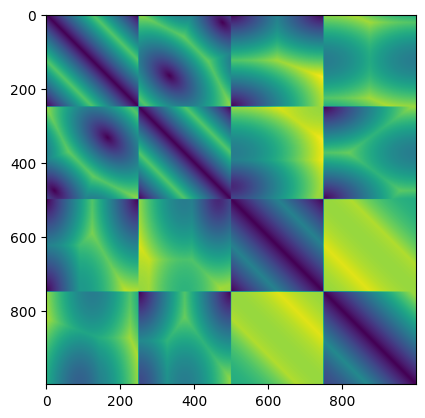

In [47]:
march = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        march[i][j] = distance_C3_correct(isoms2[i], isoms2[j],2)
plt.figure()
plt.imshow(march)
plt.show()

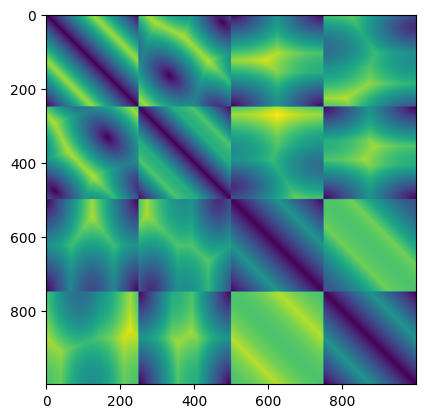

In [48]:
march2 = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        march2[i][j] = distance_C3(isoms2[i], isoms2[j],2)
plt.figure()
plt.imshow(march2)
plt.show()

0.0


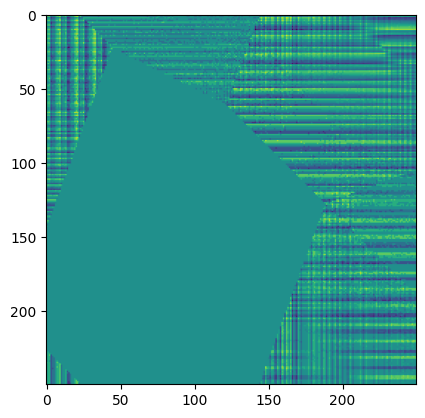

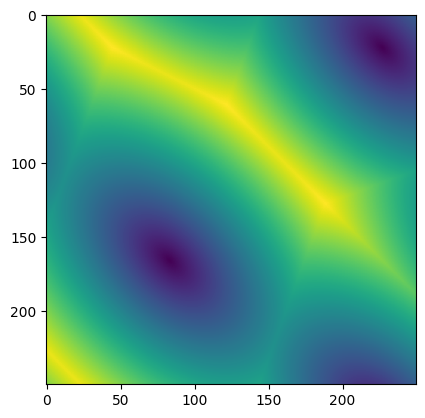

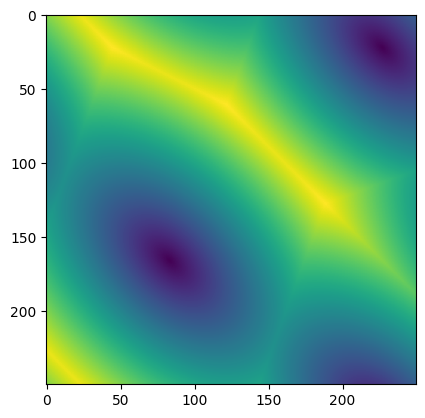

In [86]:
# print(distance_C3(isoms2[600],isoms2[900],2))
# print(distance_C3(isoms2[900],isoms2[600],2))
print((march2[0:250,250:500])[150,50] - np.rot90(np.fliplr(march2[250:500,0:250]))[150,50])
plt.figure()
plt.imshow(march2[0:250,250:500] - np.rot90(np.fliplr(march2[250:500,0:250])))
plt.show()
plt.figure()
plt.imshow(march2[0:250,250:500])
plt.show()
plt.figure()
plt.imshow(np.rot90(np.fliplr(march2[250:500,0:250])))
plt.show()
# print(distance_C3_correct(isoms2[600],isoms2[900],2))
# print(distance_C3_correct(isoms2[900],isoms2[600],2))

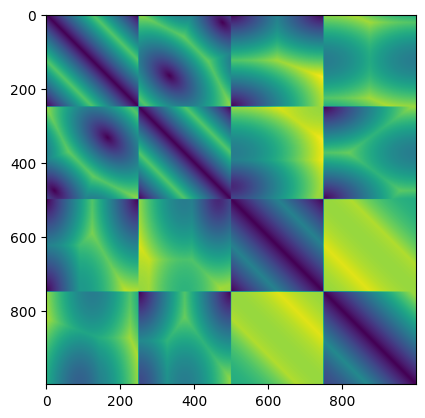

In [15]:
B = pairwise_distances(isoms2, metric = distance_C3_metric(2))
plt.figure()
plt.imshow(B)
plt.show()

In [17]:
print(distance_C3(isoms2[0],isoms2[249],2))
print(distance_C3(isoms2[250],isoms2[499],2))
print(distance_C3(isoms2[500],isoms2[749],2))
print(distance_C3(isoms2[750],isoms2[999],2))

0.0
0.0
0.0
0.0


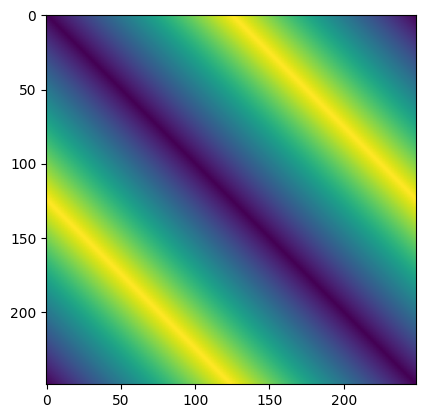

In [18]:
plt.figure()
plt.imshow(march[0:250,:250])
plt.show()

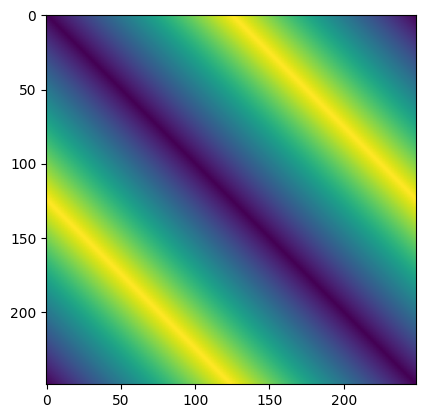

In [19]:
plt.figure()
plt.imshow(march[250:500,250:500])
plt.show()

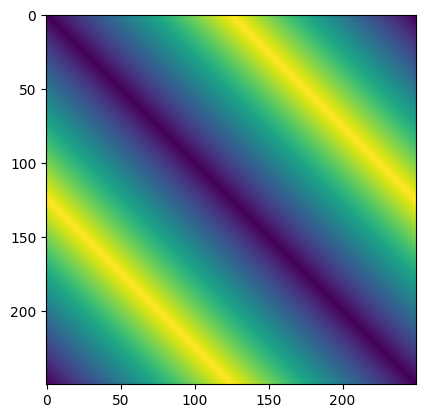

In [62]:
plt.figure()
plt.imshow(march[500:750,500:750])
plt.show()

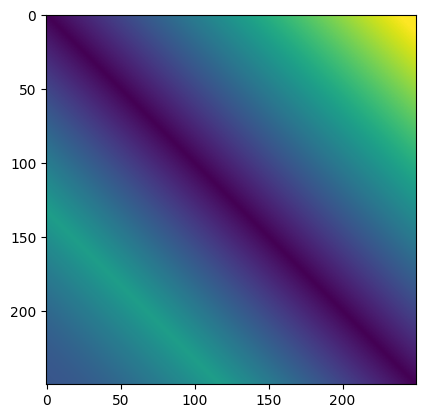

In [63]:
plt.figure()
plt.imshow(march[750:,750:])
plt.show()

In [ ]:
# (march == B).all()
tri = math.sqrt(3) / 2
# # print(march[750,999])
# # print(march[999,750])
# print(distance_C3_correct(isoms2[999],isoms2[750],2))
# print(distance_C3_correct(isoms2[750],isoms2[999],2))
# print(distance_C3(isoms2[999],isoms2[750],2))
# print(distance_C3(isoms2[750],isoms2[999],2))
# print('')
print(distance_C3_correct((-.5,-tri,0),(-.5,-tri,2 * math.pi / 3),1))
print(distance_C3((.5,-tri,0),(.5,-tri,2 * math.pi / 3),1))
# print(isoms2[750])
# print(isoms2[999])

0.9999999999999999


[1.1407884629443288, 0.8656335147097707, 0.8656335147097707, 0.6897204555571079, 0.11636495590209961]


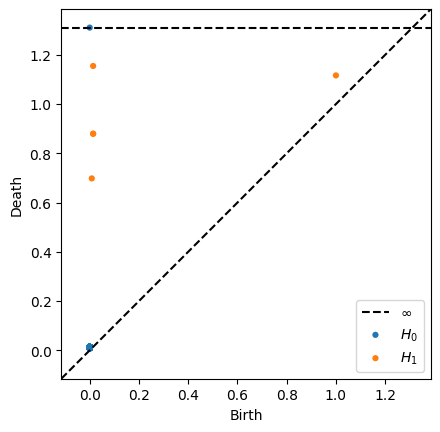

In [25]:
output = ripser(B, maxdim = 1, coeff = 2, distance_matrix = True)
persistingPoints(output,simpDim = 1)
plt.figure()
dgms = output['dgms']
plot_diagrams(dgms)

[1.1407884629443288, 0.8656335147097707, 0.8656335147097707, 0.6897204555571079, 0.11636495590209961]


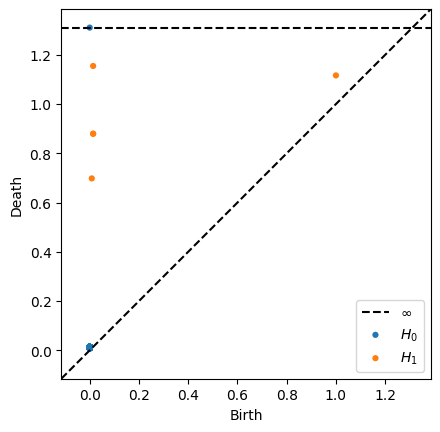

In [26]:
output = ripser(B, maxdim = 1, coeff = 3, distance_matrix = True)
persistingPoints(output,simpDim = 1)
plt.figure()
dgms = output['dgms']
plot_diagrams(dgms)

[0.5935154631733894, 0.16543415933847427, 0.15548154711723328, 0.1534009948372841, 0.14955195039510727, 0.14761243760585785]


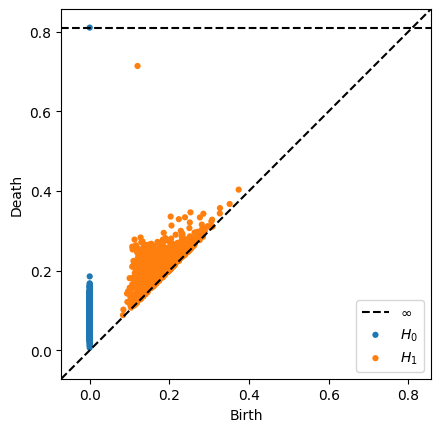

In [21]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
persistingPoints(output,simpDim = 1)
plt.figure()
dgms = output['dgms']
plot_diagrams(dgms)

[0.5935154631733894, 0.16543415933847427, 0.15548154711723328, 0.1534009948372841, 0.14955195039510727, 0.14761243760585785]


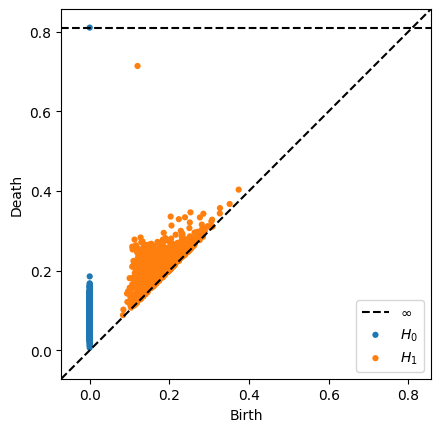

In [22]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
persistingPoints(output,simpDim = 1)
plt.figure()
dgms = output['dgms']
plot_diagrams(dgms)

In [24]:
# see how many points are persisting
def persistingPoints(res,simpDim = 1):
    Hn = res['dgms'][simpDim].tolist() # all intervals in simpDim
    d = []
    for pair in Hn: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in Hn
    d.sort(reverse = True) # sorting from longest to shortest intervals
    print(d[:6])